In [1]:
#Here I imported libraries needed to do basic EDA
import numpy as np 
import pandas as pd 
pd.set_option('display.max_rows', 120)

#Here I am importing Python libraries for data visualization
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#This is where we are reading in the outside csv file
fifa_df = pd.read_csv('../input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv', low_memory=False)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv
/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv


In [2]:
#The idea behind this was to get rid of data that wasn't needed at first to clean up the space. I didn't think we needed the URL for the player and photo, this can be readded later if needed. 
#To get rid of the data not needed I used the .drop command
fifa_df = fifa_df.drop(columns=['photoUrl'])
fifa_df = fifa_df.drop(columns=['playerUrl'])
#Here I wanted to rename the columns, used the .rename command
fifa_df = fifa_df.rename(columns={'Weight': 'Weight: lbs'})

In [3]:
fifa_df['Joined'] = pd.to_datetime(fifa_df['Joined'])

In [4]:
#Here I wanted to change the data format to have seperate columns for day, month, year
fifa_df['day'] = fifa_df['Joined'].dt.day
fifa_df['month'] = fifa_df['Joined'].dt.month
fifa_df['year'] = fifa_df['Joined'].dt.year

In [5]:
#The Hits column started a new line, so I replaced it with just a space.
fifa_df['Hits'] = fifa_df['Hits'].str.replace('\n', ' ')
#The Team & Contract column started a new line, so I replaced it with just a space.
fifa_df['Team & Contract'] = fifa_df['Team & Contract'].str.replace('\n', ' ')
#The SM column ad a star in it, so I replaced it with just a space.
fifa_df['SM'] = fifa_df['SM'].str.replace('★', ' ')

In [6]:
#The Team & Contract columns were originally 2 different columns, here I joined them as one.
fifa_df[['Team', 'Contract']] = fifa_df['Team & Contract'].str.split(' & ', expand=True)

In [7]:
fifa_df['Weight: lbs'] = fifa_df['Weight: lbs'].str.replace('lbs', ' ')
fifa_df['Weight: lbs']
fifa_df['Weight: lbs'] = fifa_df['Weight: lbs'].astype(str).astype(int)

In [8]:
#fifa_df['Wage'] = fifa_df['Wage'].str.replace('€', ' ')
#fifa_df['Wage'] = fifa_df['Wage'].str.replace('K', ' ')
#fifa_df['Wage'] = fifa_df['Wage'].astype(str).astype(int)

In [9]:
#fifa_df['Value'] = fifa_df['Value'].str.replace('€', ' ')
#fifa_df['Value'] = fifa_df['Value'].str.replace('M', ' ')
#fifa_df['Value'] = fifa_df['Value'].str.replace('K', ' ')
#fifa_df['Value'] = fifa_df['Value'].astype(float).astype(int)

In [10]:
#This was personally the hardest part for me. Trying to figure out to convert the M's and K's to Euro's. As you can see the above two code cells are what I tried doing, but ultimately did not work.

#This code block is what I ended up googling and coming up with and it worked with my dataset. 

#The reason I kept my code and explained it this way, this shows my thought process of running into a road block and having to find a way to keep going rather than giving up.

def value_setting(value): 
    if isinstance(value, str):
        if value.find("M") != -1:
            return int(float(value.replace("M", "").replace('€', '')) * 1000000)
        elif value.find("K") != -1: 
            return int(value.replace("K", "").replace("€", "")) * 1000 
    else:
        return int(value)

In [11]:
#Created a 'Value' and 'Wage' column that helped replace the M's and K's to the Euro sign. 
fifa_df['Value'] = fifa_df['Value'].apply(value_setting)
fifa_df['Wage'] = fifa_df['Wage'].apply(value_setting)

In [12]:
#This just shows the new 'Wage' and 'Value' columns
fifa_df[['Wage', 'Value']] 

,Wage,Value
0,560000.0,67500000.0
1,220000.0,46000000.0
2,125000.0,75000000.0
3,370000.0,87000000.0
4,270000.0,90000000.0
...,...,...
18974,1000.0,35000.0
18975,NaN,60000.0
18976,1000.0,40000.0
18977,NaN,60000.0


<Axes: xlabel='Value', ylabel='Wage'>

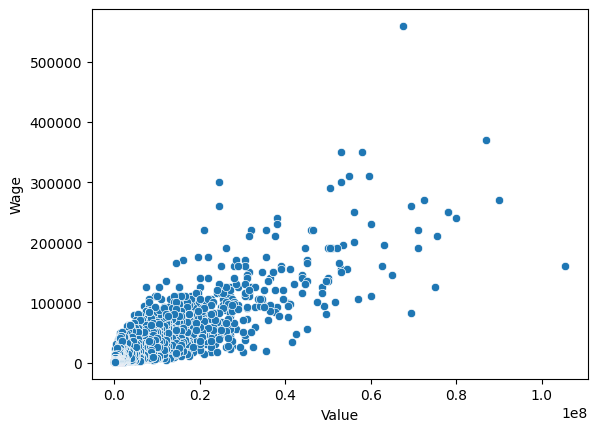

In [13]:
#Here I created a scatter plot where the X values are the value of the player, and the Y values are the wage in 1000's Euros
sns.scatterplot(x=fifa_df['Value'], y=fifa_df['Wage'])

<Axes: xlabel='Value', ylabel='Wage'>

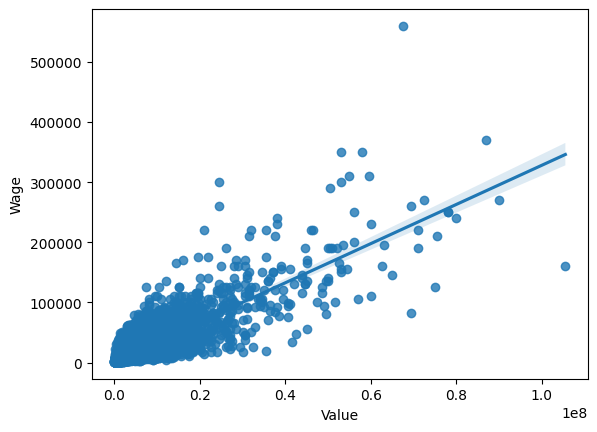

In [14]:
#This is the same plot as the one above, but this is a linear regression model used with seaborn. 
sns.regplot(x=fifa_df['Value'], y=fifa_df['Wage'])